In [3]:
### Pass the Pigs
#Frequencies from the histograms made on Monday 5/6/2019
## Dot, NoDot, Razor,Trottor, Sounter, Leaning Jowler, Other
import numpy as np
F=np.array([[7,8,26,5,2,0,3], [37, 52, 55, 9, 4, 1,4], [30,22, 29, 3, 0, 0,0], [33, 44, 34, 4, 0,0,0], [29, 34, 40, 12, 1, 0,0], [11,21,29,11,2,2,3],[15,15,30,12,3,0,0],[17,29,35,6,4,1,9],[23,21,24,11,2,1,5],[20,27,18,5,1,0,4],[16,20,30,14,7,1,1],[28,40,36,8,2,0,0],[10,30,27,9,7,0,9]])
F

array([[ 7,  8, 26,  5,  2,  0,  3],
       [37, 52, 55,  9,  4,  1,  4],
       [30, 22, 29,  3,  0,  0,  0],
       [33, 44, 34,  4,  0,  0,  0],
       [29, 34, 40, 12,  1,  0,  0],
       [11, 21, 29, 11,  2,  2,  3],
       [15, 15, 30, 12,  3,  0,  0],
       [17, 29, 35,  6,  4,  1,  9],
       [23, 21, 24, 11,  2,  1,  5],
       [20, 27, 18,  5,  1,  0,  4],
       [16, 20, 30, 14,  7,  1,  1],
       [28, 40, 36,  8,  2,  0,  0],
       [10, 30, 27,  9,  7,  0,  9]])

In [4]:
## Score function: Feel free to modify or reimplement this code however you want to.

def Score (x, roll):
    if roll[0]>roll[1]:
        temp=roll[1]
        roll[1]=roll[0]
        roll[0]=temp
    if roll == [1,1]: ## sider with dots showing
        return x+1
    elif roll == [2,2]: ## sider with nodots showing
        return x+1
    elif roll == [3,3]: ## double razor
        return x+ 20
    elif roll == [4,4]: ## double trotter
        return x+20
    elif roll == [5,5]: ## double snouter
        return x+40
    elif roll == [6,6]: ##  double leaning jowler
        return x+60
    elif roll == [1,2]: ## pig out
        return 0
    elif roll == [1,3]or[2,3]: ## razor
        return x+5
    elif roll == [1,4]or[2,4]: ## trotter
        return x+5
    elif roll == [1,5]or[2,5]: ## snouter
        return x+10
    elif roll == [1,6]or[2,6]: ## leaning jowler
        return x+15
    elif roll == [3,4]: # razor plus trotter
        return x + 5+5
    elif roll == [3,5]: #razor plus snouter
        return x + 5+10
    elif roll == [3,6]: #razor plus leaning jowler
        return x + 5+ 15
    elif roll == [4,5]: #trotter plus snouter
        return x + 5+10
    elif roll == [4,6]: #trotter plus leaning jowler
        return x + 5+ 15
    elif roll == [5,6]: #trotter plus leaning jowler
        return x + 10+ 15
    elif (roll[0] == 7) or (roll[1] == 7 ): #other rolled, reroll with no penalty
        return x
    
counts=sum(F[:,:6]) # not counting other rolls
counts
    

array([276, 363, 413, 109,  35,   6])

In [5]:
P_sum=np.sum(counts)
P=counts/P_sum
P

array([0.2296173 , 0.30199667, 0.34359401, 0.0906822 , 0.02911814,
       0.00499168])

In [6]:
np.sum(P)

0.9999999999999999

In [7]:
import random
random.random()

0.49027474004042626

In [8]:
CDF = np.append([0],np.cumsum(P))
CDF #cumulative distribution function for 7 possibilities is given by list of 7 numbers

array([0.        , 0.2296173 , 0.53161398, 0.87520799, 0.96589018,
       0.99500832, 1.        ])

In [9]:
def pigroll():
    x = random.random()
    roll =-1
    for i in range(7):
        if x>CDF[i]:
            roll = roll + 1
    return roll
np.array([pigroll() for i in range(100)])

array([0, 1, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 3, 1, 0, 0, 2, 2, 0, 1, 2, 3, 0, 2, 0, 2, 0, 1, 1, 2, 0, 2,
       2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 3, 0, 4, 1, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 3, 2, 2, 0, 2, 1, 3, 2, 0, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 3, 2, 1, 1, 2, 2])

In [10]:
Test = [0 for i in range(6)] ## Looks like we are getting some numbers larger and some smaller than they should be
for i in range(1000):
    temp = pigroll()
    Test[temp] = Test[temp]+1
Test

[213, 322, 337, 83, 43, 2]

In [11]:
[float(p) for p in P]

[0.22961730449251247,
 0.3019966722129784,
 0.34359400998336104,
 0.09068219633943428,
 0.029118136439267885,
 0.004991680532445923]

In [12]:
Test2 = [0 for i in range(6)] ## looks better!
for i in range(10000):
    temp = pigroll()
    Test2[temp] = Test2[temp]+1
Test2

[2310, 3063, 3430, 883, 265, 49]

In [13]:
roll = [pigroll()+1, pigroll()+1]

roll, Score(3, roll)

([3, 3], 23)

In [14]:
Record_Scores=[]
for i in range(100):
    ## simulation of rolling two pig dice
    roll = [pigroll()+1, pigroll()+1]
    Record_Scores.append(Score(0, roll))
max(Record_Scores)

20

In [15]:
print(Record_Scores)

[5, 0, 5, 20, 5, 5, 20, 5, 5, 5, 5, 5, 0, 20, 5, 5, 0, 5, 5, 5, 0, 0, 0, 5, 5, 5, 5, 20, 0, 5, 5, 0, 5, 0, 5, 5, 0, 5, 5, 5, 5, 5, 1, 5, 5, 5, 0, 5, 5, 5, 5, 0, 5, 5, 5, 1, 5, 5, 20, 5, 1, 1, 1, 5, 5, 1, 20, 5, 1, 5, 5, 5, 0, 5, 5, 0, 5, 1, 5, 5, 5, 1, 1, 20, 1, 0, 5, 5, 1, 1, 5, 5, 5, 1, 5, 0, 5, 0, 5, 0]


In [16]:
Totals = np.array([0 for i in range(61)])
for i in Record_Scores:
    Totals[i]=Totals[i]+1
Totals

array([18, 14,  0,  0,  0, 61,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [17]:
Q=[Totals[i]/100 for i in range(61)]
## probability of +0, +1, +2 ,...
print(Q)

[0.18, 0.14, 0.0, 0.0, 0.0, 0.61, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [18]:
EV=np.sum(i*Q[i] for i in range(1,61))
EV

4.59

In [19]:
x=np.array([i for i in range(61)])
y=np.array([i*(1-Q[0])+EV for i in range(61)])
import matplotlib.pyplot as plt
plt.plot(x,y)

25.5
15.759


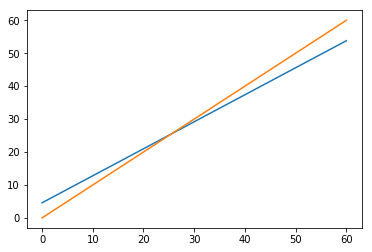

In [20]:
plt.plot(x,y)
plt.plot(x,x)
ceil_score=EV/Q[0]
print(ceil_score)
treshold=ceil_score*0.618
print(treshold)

In [21]:
## sample strategy:stop at 10
def sara_billey_slow_and_steedy (opponentscore, myscore, myturnscore,round):
    if myturnscore>10:
        return False
    else:
        return True

sara_billey_slow_and_steedy (99,10,2,4)


True

## My strategy:
Here are some of my consideration about this problem:  
* There should be a ceiling score that you should not roll anymore once your turn score get to the ceil  
* If opponentscore>myscore,we should try to take risks and get a higher score
* If myscore>opponentscore,we'd better not to take risks
* If round time is dangerous for us to continue,stop rolling  
  
According to above thought,my strategy is interpreted as follow:  
* Calculate the ceiling score,it's exactly the intersection point on the Expect score plot.
* Choose initial treshold value as 0.618*ceil_score to get a golden section(as the sara_billey_slow_and_steedy strategy's treshold is 10)
* According to score gap,dynamic adjust the treshold,but the is a min treshold as 10 and a max treshold as ceil_score.
* If round times is more than 6,stop rolling.
* Use chosen treshold make a decision,return True for roll,False for stop this turn.

In [22]:
## my strategy:make decision based on treshold(ceil_score*0.618),increase treshold or decrease it according to score_gap(opponentscore-myscore).
def my_strategy_yanchen_liu(opponentscore, myscore, myturnscore,roundtime):
    treshold=ceil_score*0.618-2 # Choose initial treshold value as 0.618*ceil_score
    score_gap=opponentscore-myscore # Caculate score_gap
    treshold=treshold+score_gap# if score_gap>0,increase treshold;if score_gap<0,decrease treshold.
    if treshold>ceil_score:
        treshold=ceil_score # the max treshold is ceil_score
    elif treshold<10:
        treshold=10 # the min treshold is 10
        
    # stop this turn for the round times is too dagerous:
    if roundtime > 6:
        return False
    
    # now,we do the decision according to treshold and myturnscore
    if myturnscore>treshold:
        return False
    else:
        return True

#test
my_strategy_yanchen_liu (1,10,9,4)
    

True

In [24]:
def competition_simulation(player1,player2,num):
    ## this is a game simulate function,
    ## player1,player2:str of 2 players' name,should be 'slow_and_steedy' or 'my_strategy'
    ## times: the simulation times of the competition
    player1_win_times=0 # player1_win_times record the winning times of player1
    for t in range(num):# do the competition for num times
        score1=0
        score2=0
        turnscore1=0
        turnscore2=0
        roundtime=0
        nowplayer=1
        while nowplayer!=3:# stop until one win
            if nowplayer==1:# it's player1's turn
                while 1:
                    if player1=="slow_and_steedy":
                        if sara_billey_slow_and_steedy(score2,score1,turnscore1,roundtime):# 'slow_and_steedy' player1 roll
                            roll = [pigroll()+1, pigroll()+1]
                            #print("1 slow_and_steedy:")
                            turnscore1=Score(turnscore1, roll)
                            #print(turnscore1)
                            if turnscore1==0:
                                nowplayer=2
                                break
                            elif turnscore1>99:
                                player1_win_times=player1_win_times+1
                                nowplayer=3
                                break
                            roundtime=roundtime+1
                        else:# 'slow_and_steedy' player1 stop his turn
                            roundtime=0
                            score1=score1+turnscore1
                            turnscore1=0
                            nowplayer=2
                            if score1>99:
                                player1_win_times=player1_win_times+1
                                nowplayer=3
                            break
                    elif player1=="my_strategy":
                        if my_strategy_yanchen_liu(score2,score1,turnscore1,roundtime):# 'my_strategy' player1 roll
                            roll = [pigroll()+1, pigroll()+1]
                            #print("1 my_strategy:")
                            turnscore1=Score(turnscore1, roll)
                            #print(turnscore1)
                            if turnscore1==0:
                                nowplayer=2
                                break
                            elif turnscore1>99:
                                player1_win_times=player1_win_times+1
                                nowplayer=3
                                break
                            roundtime=roundtime+1
                        else:# 'my_strategy' player1 stop his turn
                            roundtime=0
                            score1=score1+turnscore1
                            turnscore1=0
                            nowplayer=2
                            if score1>99:
                                player1_win_times=player1_win_times+1
                                nowplayer=3
                            break
            elif nowplayer==2:# it's player2's turn
                while 1:
                    if player2=="slow_and_steedy":
                        if sara_billey_slow_and_steedy(score1,score2,turnscore2,roundtime):# 'slow_and_steedy' player2 roll
                            roll = [pigroll()+1, pigroll()+1]
                            #print("2 slow_and_steedy:")
                            turnscore2=Score(turnscore2, roll)
                            #print(turnscore2)
                            if turnscore2==0:
                                nowplayer=1
                                break
                            elif turnscore2>99:
                                nowplayer=3
                                break
                            roundtime=roundtime+1
                        else:# 'slow_and_steedy' player1 stop his turn
                            roundtime=0
                            score2=score2+turnscore2
                            turnscore2=0
                            nowplayer=1
                            if score2>99:
                                nowplayer=3
                            break
                    elif player2=="my_strategy":
                        if my_strategy_yanchen_liu(score1,score2,turnscore2,roundtime):# 'my_strategy' player1 roll
                            roll = [pigroll()+1, pigroll()+1]
                            #print("2 my_strategy:")
                            turnscore2=Score(turnscore2, roll)
                            #print(turnscore2)
                            if turnscore2==0:
                                nowplayer=1
                                break
                            elif turnscore2>99:
                                nowplayer=3
                                break
                            roundtime=roundtime+1
                        else:# 'my_strategy' player1 roll
                            roundtime=0
                            score2=score2+turnscore2
                            turnscore2=0
                            nowplayer=1
                            if score2>99:
                                nowplayer=3
                            break
                           
    print("the win ratio of player1 is:%f"%(player1_win_times/num)) # output the win ratio of player1

                    
competition_simulation("slow_and_steedy","my_strategy",1000)
competition_simulation("my_strategy","slow_and_steedy",1000)


the win ratio of player1 is:0.378000
the win ratio of player1 is:0.696000
